In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
print(len (X_train))
print(len (y_train))
print(len (X_test))
print(len (y_test))

5707
5707
1903
1903


# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

Epoch 1/1000
 1/45 ━━━━━━━━━━━━━━━━━━━━ 30s 699ms/step - accuracy: 0.2891 - loss: 1.6267
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2432 - loss: 1.6159 - val_accuracy: 0.3673 - val_loss: 1.5098
Epoch 2/1000
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2969 - loss: 1.5350
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3114 - loss: 1.5234 - val_accuracy: 0.4157 - val_loss: 1.3957
Epoch 3/1000
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3438 - loss: 1.4768
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3820 - loss: 1.4296 - val_accuracy: 0.6490 - val_loss: 1.2627
Epoch 4/1000
 1/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5312 - loss: 1.3564
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

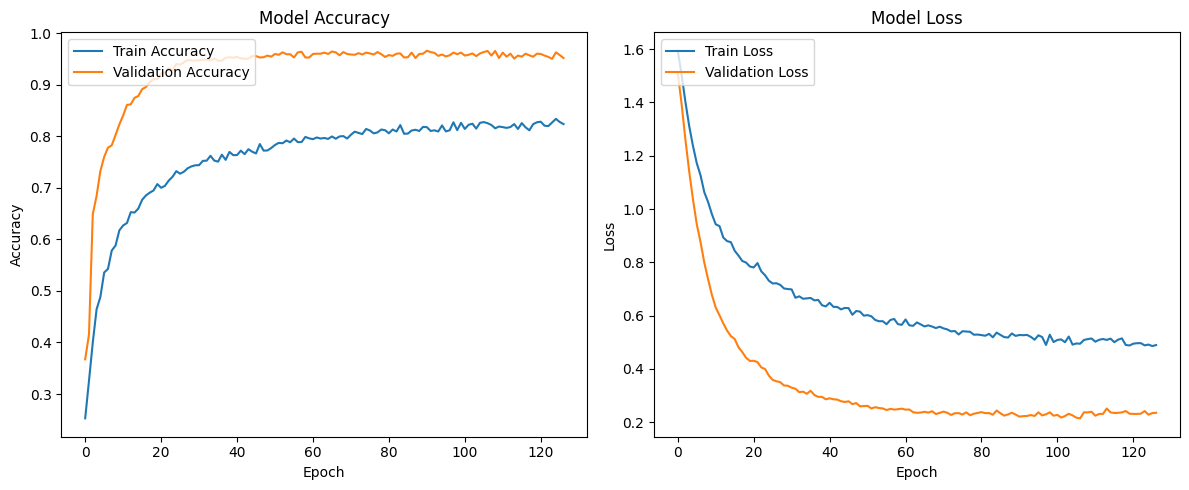

In [12]:
# Ensure the model is being trained and history is captured
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

# Check if the history object is created
print(history.history.keys())

# If history exists, plot the accuracy and loss
if history:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()



In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9516 - loss: 0.2344


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[6.2002871e-02 5.4517722e-01 3.8925347e-01 3.8934313e-04 3.1770428e-03]
1


# Confusion matrix

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step


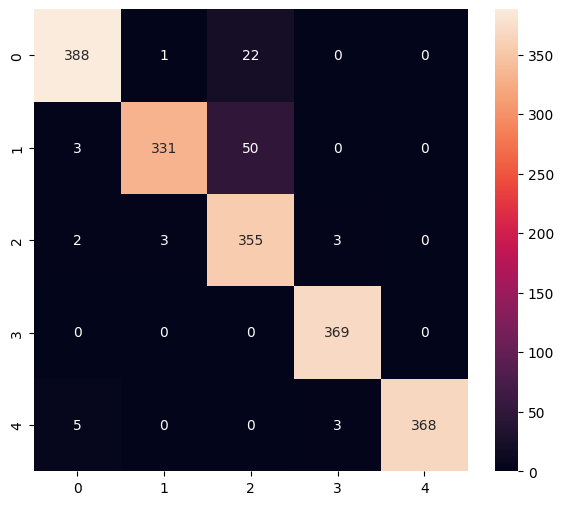

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       411
           1       0.99      0.86      0.92       384
           2       0.83      0.98      0.90       363
           3       0.98      1.00      0.99       369
           4       1.00      0.98      0.99       376

    accuracy                           0.95      1903
   macro avg       0.96      0.95      0.95      1903
weighted avg       0.96      0.95      0.95      1903



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Jhevish\AppData\Local\Temp\tmpj_oy7qq_\assets


INFO:tensorflow:Assets written to: C:\Users\Jhevish\AppData\Local\Temp\tmpj_oy7qq_\assets


Saved artifact at 'C:\Users\Jhevish\AppData\Local\Temp\tmpj_oy7qq_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2703150746432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703150746256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703150756640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703150758928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703150875568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2703150878560: TensorSpec(shape=(), dtype=tf.resource, name=None)


6580

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.2002897e-02 5.4517692e-01 3.8925371e-01 3.8934383e-04 3.1770486e-03]
1


In [24]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
dataset_path = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X_dataset):
    X_train, X_test = X_dataset[train_index], X_dataset[test_index]
    y_train, y_test = y_dataset[train_index], y_dataset[test_index]
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
    
    # Predict on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Calculate average scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f'Average Accuracy: {avg_accuracy}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')





48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Average Accuracy: 0.9521681997371878
Average Precision: 0.9552895649567068
Average Recall: 0.9521681997371878
Average F1 Score: 0.9521315198984693


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Average Accuracy: 0.9511169513797635
Average Precision: 0.95383851601247
Average Recall: 0.9511169513797635
Average F1 Score: 0.950911062580398


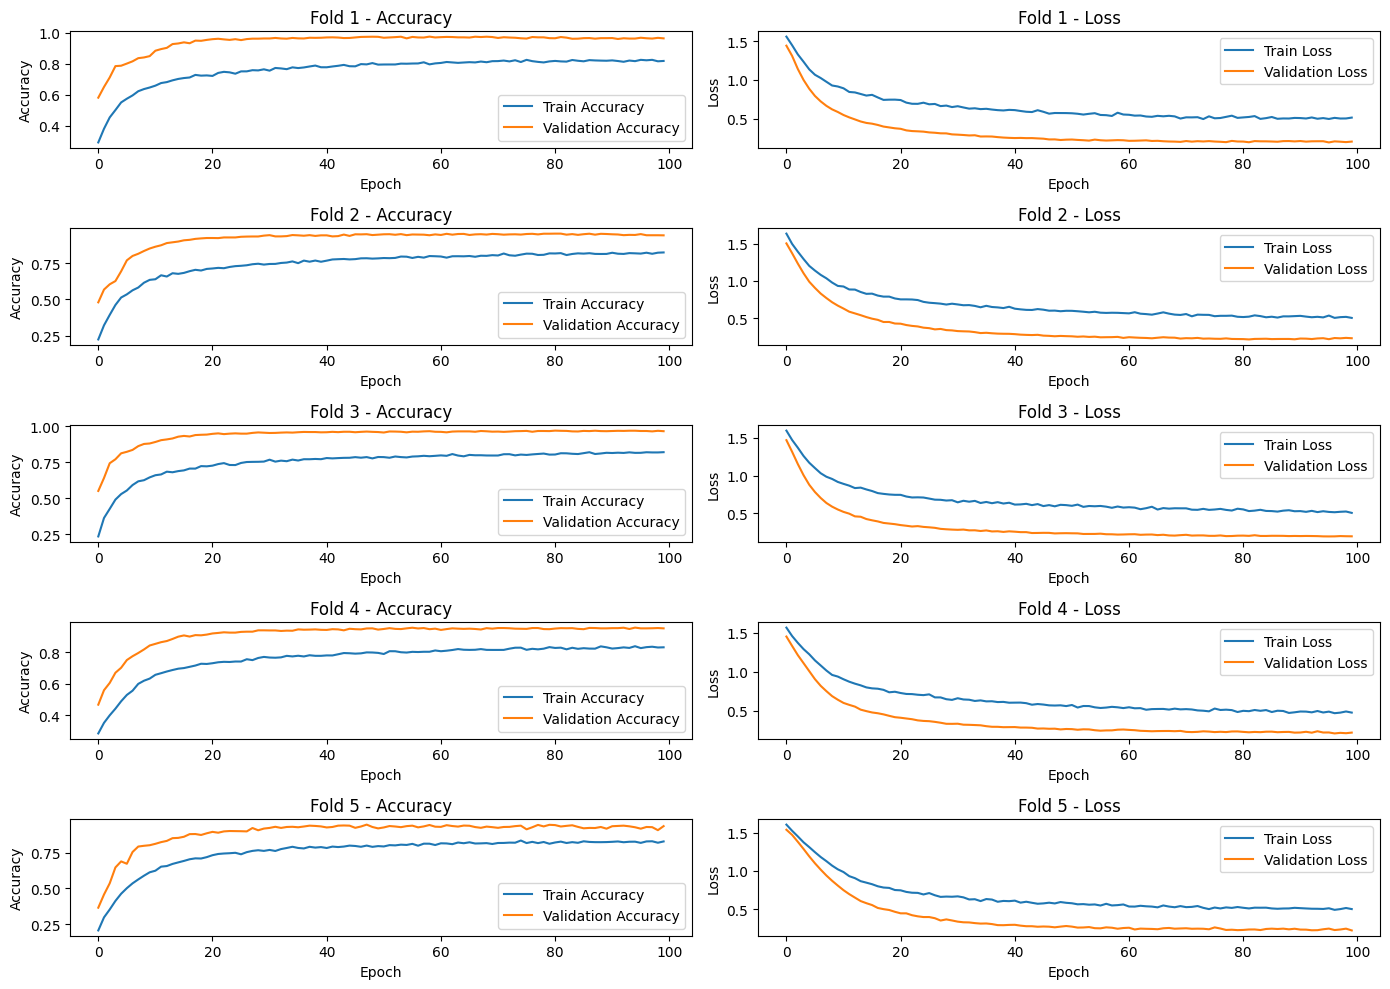

In [25]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
history_list = []  # To store the history objects for each fold

for train_index, test_index in kf.split(X_dataset):
    X_train, X_test = X_dataset[train_index], X_dataset[test_index]
    y_train, y_test = y_dataset[train_index], y_dataset[test_index]
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0, validation_data=(X_test, y_test))
    history_list.append(history)
    
    # Predict on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Calculate average scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f'Average Accuracy: {avg_accuracy}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')

# Plotting the training and validation accuracy and loss for each fold
plt.figure(figsize=(14, 10))

for i, history in enumerate(history_list):
    plt.subplot(5, 2, i * 2 + 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i+1} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(5, 2, i * 2 + 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i+1} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


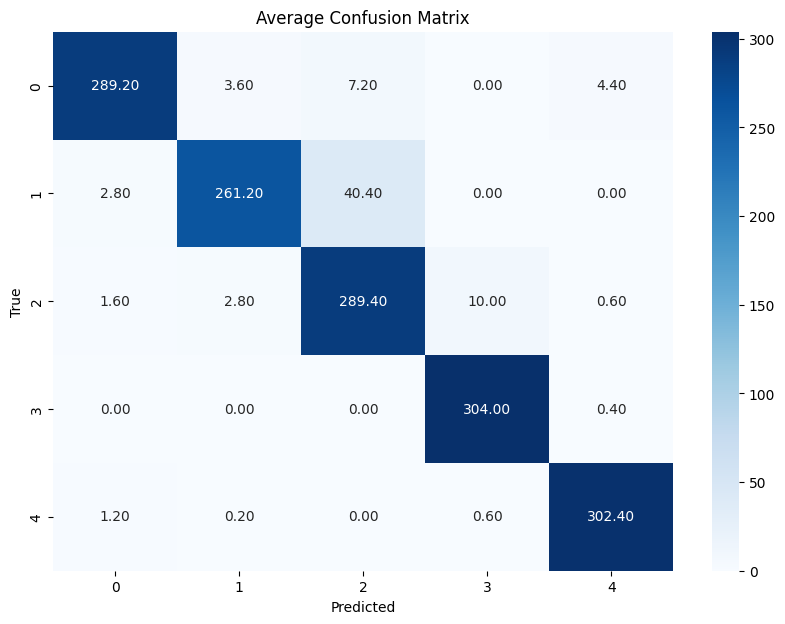

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Re-run the model's predictions on each fold to collect confusion matrices
kf = KFold(n_splits=5, shuffle=True, random_state=42)
confusion_matrices = []

for train_index, test_index in kf.split(X_dataset):
    X_train, X_test = X_dataset[train_index], X_dataset[test_index]
    y_train, y_test = y_dataset[train_index], y_dataset[test_index]
    
    # Define the model (same as in your original code)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model (reusing the same parameters as before)
    model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
    
    # Predict on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    # Store confusion matrix for each fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Calculate the average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Running 5-Fold Cross-Validation to collect confusion matrices...

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix for Fold 1:
[[318   3   5   0   2]
 [  3 285  25   0   0]
 [  1   2 279  13   1]
 [  0   0   0 295   0]
 [  2   0   0   0 288]]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix for Fold 2:
[[294   7   3   0   3]
 [  3 266  38   0   0]
 [  1   1 270  13   0]
 [  0   0   0 305   1]
 [  2   0   0   2 313]]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
Confusion Matrix for Fold 3:
[[281   5   4   1   5]
 [  8 264  11   0   0]
 [  1   5 307  11   2]
 [  0   0   0 317   0]
 [  0   0   0   0 300]]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
Confusion Matrix for Fold 4:
[[306   1  11   0   3]
 [  5 255  43   0   0]
 [  2   0 283  15   2]
 [  0   0   0 278   1]
 [  0   0   0   4 313]]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix for Fold 5:
[[255   3   9   0   3]
 [  3 269  44   0   0]
 [  2   1 304   6   0]
 [  0   0   0 324   1]
 [  1   0   0   0 297]]

Aver

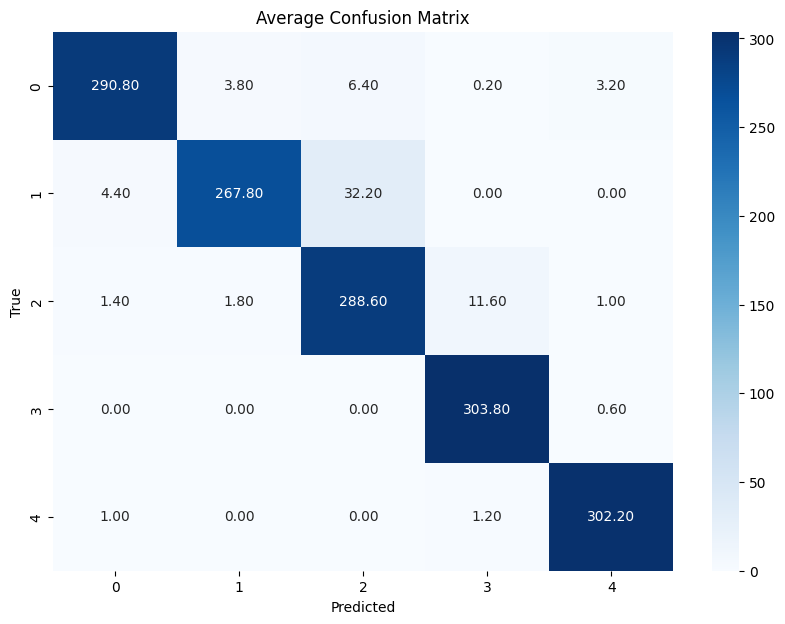

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Re-run the model's predictions on each fold to collect confusion matrices
kf = KFold(n_splits=5, shuffle=True, random_state=42)
confusion_matrices = []

print("Running 5-Fold Cross-Validation to collect confusion matrices...\n")

for fold, (train_index, test_index) in enumerate(kf.split(X_dataset), 1):
    X_train, X_test = X_dataset[train_index], X_dataset[test_index]
    y_train, y_test = y_dataset[train_index], y_dataset[test_index]
    
    # Define the model (same as in your original code)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model (reusing the same parameters as before)
    model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)
    
    # Predict on the test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    # Store confusion matrix for each fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    print(f"Confusion Matrix for Fold {fold}:\n{cm}\n")

# Calculate the average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

print(f"Average Confusion Matrix:\n{avg_confusion_matrix}\n")

# Plot the average confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [28]:
#Validation Curve- accuracy:

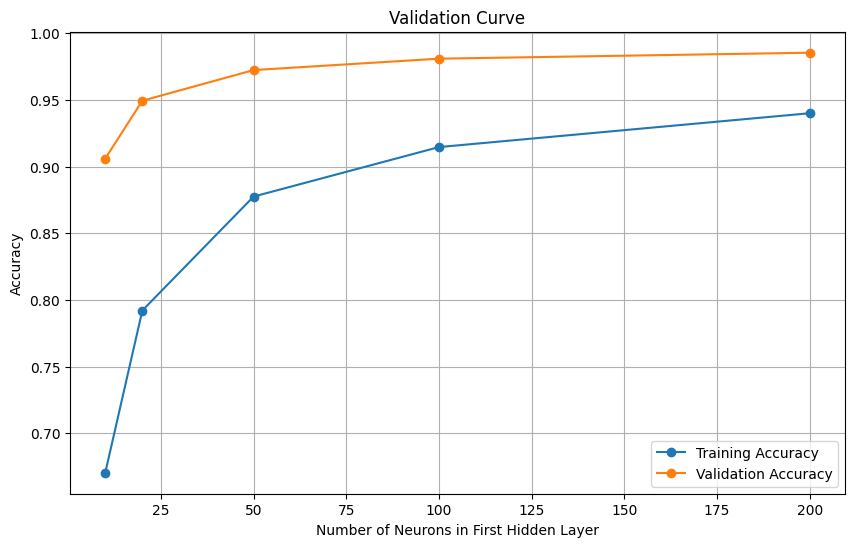

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter values to test
neuron_counts = [10, 20, 50, 100, 200]

train_scores = []
valid_scores = []

for neurons in neuron_counts:
    fold_train_scores = []
    fold_valid_scores = []
    
    for train_index, test_index in kf.split(X_dataset):
        X_train, X_test = X_dataset[train_index], X_dataset[test_index]
        y_train, y_test = y_dataset[train_index], y_dataset[test_index]
        
        # Define the model
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((21 * 2, )),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(neurons, activation='relu'),  # Varying the number of neurons
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')
        ])
        
        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))
        
        # Record scores
        fold_train_scores.append(history.history['accuracy'][-1])  # Last training accuracy
        fold_valid_scores.append(history.history['val_accuracy'][-1])  # Last validation accuracy
    
    # Average scores over all folds
    train_scores.append(np.mean(fold_train_scores))
    valid_scores.append(np.mean(fold_valid_scores))

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(neuron_counts, train_scores, label='Training Accuracy', marker='o')
plt.plot(neuron_counts, valid_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Neurons in First Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter values to test
neuron_counts = [10, 20, 50, 100, 200]

train_scores = []
valid_scores = []

for neurons in neuron_counts:
    fold_train_scores = []
    fold_valid_scores = []
    
    for train_index, test_index in kf.split(X_dataset):
        X_train, X_test = X_dataset[train_index], X_dataset[test_index]
        y_train, y_test = y_dataset[train_index], y_dataset[test_index]
        
        # Define the model
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((21 * 2, )),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(neurons, activation='relu'),  # Varying the number of neurons
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(20, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        
        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))
        
        # Record scores
        fold_train_scores.append(history.history['accuracy'][-1])  # Last training accuracy
        fold_valid_scores.append(history.history['val_accuracy'][-1])  # Last validation accuracy
    
    # Average scores over all folds
    train_scores.append(np.mean(fold_train_scores))
    valid_scores.append(np.mean(fold_valid_scores))

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(neuron_counts, train_scores, label='Training Accuracy', marker='o')
plt.plot(neuron_counts, valid_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Neurons in First Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Hyperparameter values to test
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

train_scores = []
valid_scores = []

for lr in learning_rates:
    fold_train_scores = []
    fold_valid_scores = []
    
    for train_index, test_index in kf.split(X_dataset):
        X_train, X_test = X_dataset[train_index], X_dataset[test_index]
        y_train, y_test = y_dataset[train_index], y_dataset[test_index]
        
        # Define the model (same structure as before)
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((21 * 2, )),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(50, activation='relu'),  # Using 50 neurons as an example since optimum
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(20, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        
        # Compile the model with varying learning rate
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))
        
        # Record scores
        fold_train_scores.append(history.history['accuracy'][-1])
        fold_valid_scores.append(history.history['val_accuracy'][-1])
    
    # Average scores over all folds
    train_scores.append(np.mean(fold_train_scores))
    valid_scores.append(np.mean(fold_valid_scores))

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores, label='Training Accuracy', marker='o')
plt.plot(learning_rates, valid_scores, label='Validation Accuracy', marker='o')
plt.xscale('log')  # Log scale for learning rates
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Learning Curve Analysis

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into a training set and a validation set if not done already
X_train_full, X_val, y_train_full, y_val = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)

# Define the model function if needed
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Sizes of training data subsets to evaluate
train_sizes = np.linspace(0.1, 0.99, 10)  # 10 points from 10% to 99% of the data

train_scores = []
val_scores = []

for train_size in train_sizes:
    # Create a smaller training set
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=42)
    
    model = create_model()  # Use your model creation function
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_val, y_val))
    
    # Record the scores
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(X_train_full), train_scores, label='Training Accuracy', marker='o')
plt.plot(train_sizes * len(X_train_full), val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Code to Vary Dropout Rate

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'model/keypoint_classifier/keypoint.csv'
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='int32', usecols=(0))

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter values to test (dropout rates)
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

train_scores = []
valid_scores = []

for dropout_rate in dropout_rates:
    fold_train_scores = []
    fold_valid_scores = []
    
    print(f"\nTesting with Dropout Rate: {dropout_rate}")
    
    for fold, (train_index, test_index) in enumerate(kf.split(X_dataset)):
        X_train, X_test = X_dataset[train_index], X_dataset[test_index]
        y_train, y_test = y_dataset[train_index], y_dataset[test_index]
        
        # Define the model with varying dropout rate
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input((21 * 2, )),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(20, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')
        ])
        
        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_data=(X_test, y_test))
        
        # Record scores
        train_acc = history.history['accuracy'][-1]
        val_acc = history.history['val_accuracy'][-1]
        
        fold_train_scores.append(train_acc)
        fold_valid_scores.append(val_acc)
        
        # Print the results for this fold
        print(f"  Fold {fold + 1} - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")
    
    # Average scores over all folds
    avg_train_score = np.mean(fold_train_scores)
    avg_valid_score = np.mean(fold_valid_scores)
    
    train_scores.append(avg_train_score)
    valid_scores.append(avg_valid_score)
    
    # Print average scores for this dropout rate
    print(f"Average Training Accuracy for Dropout {dropout_rate}: {avg_train_score:.4f}")
    print(f"Average Validation Accuracy for Dropout {dropout_rate}: {avg_valid_score:.4f}")

# Plotting the dropout rate against the accuracies
plt.figure(figsize=(10, 6))
plt.plot(dropout_rates, train_scores, label='Training Accuracy', marker='o')
plt.plot(dropout_rates, valid_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout Rate on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_model(dropout_rate=0.2, dense_units=64, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2, )),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(dense_units, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(dense_units // 2, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Set a fixed number of epochs
fixed_epochs = 100

# Wrap the model in KerasClassifier for RandomizedSearchCV
model = KerasClassifier(build_fn=build_model, epochs=fixed_epochs, batch_size=128, verbose=0)

# Define the hyperparameters grid to search
param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'dense_units': [32, 64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [64, 128, 256]
}

# Use RandomizedSearchCV to search the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=1)

# Fit the random search model
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", random_search_result.best_params_)
print("Best Accuracy: ", random_search_result.best_score_)


In [ ]:
import matplotlib.pyplot as plt

# Retrieve the best model from the search
best_model = random_search_result.best_estimator_.model

# Evaluate the best model on the test set
history = best_model.fit(X_train, y_train, epochs=fixed_epochs, batch_size=random_search_result.best_params_['batch_size'], validation_data=(X_test, y_test))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Evaluate the best model on the test set
val_loss, val_acc = best_model.evaluate(X_test, y_test, batch_size=random_search_result.best_params_['batch_size'])
print(f"Test Loss: {val_loss}")
print(f"Test Accuracy: {val_acc}")
